# Heart Disease Prediction Analysis

## Context and Dataset Description
This notebook aims to predict the presence of heart disease using the UCI Heart Disease dataset, a collection of medical records from multiple institutions. The dataset contains 920 rows and 17 columns, including patient demographics, clinical measurements, and diagnostic features. The target variable (`target`) is binary, where 0 indicates no heart disease and 1 indicates the presence of heart disease, derived from the `num` column (0 = no disease, 1–4 = disease).

The dataset includes both numerical features (e.g., `age`, `trestbps`, `chol`) and categorical features (e.g., `sex`, `cp`, `thal`). Missing values and outliers are handled to prepare the data for machine learning models.

**Source**: [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)

## Import Libraries and Dataset Overview
Imports essential Python libraries (e.g., pandas, matplotlib, seaborn, numpy) for data manipulation and visualization. Loads the UCI Heart Disease dataset from a CSV file and creates a binary `target` variable based on the `num` column.

Also provides a high-level summary of the dataset, including its shape (rows and columns) and data types of each column. Displays the first few rows to give an initial look at the data structure.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Loading dataset
df = pd.read_csv('heart_disease_uci.csv')

# Creating binary classification target (0 = no heart disease, 1 = heart disease)
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

In [2]:
# Dataset overview
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)

Dataset Shape: (920, 17)

Column Data Types:
 id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
target        int64
dtype: object


In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
 16  target    920 non-null    int64  
dtypes: float64(5), int64(4), object(8)
memory usage: 122.3+ KB


## Initial Analysis of Dataset

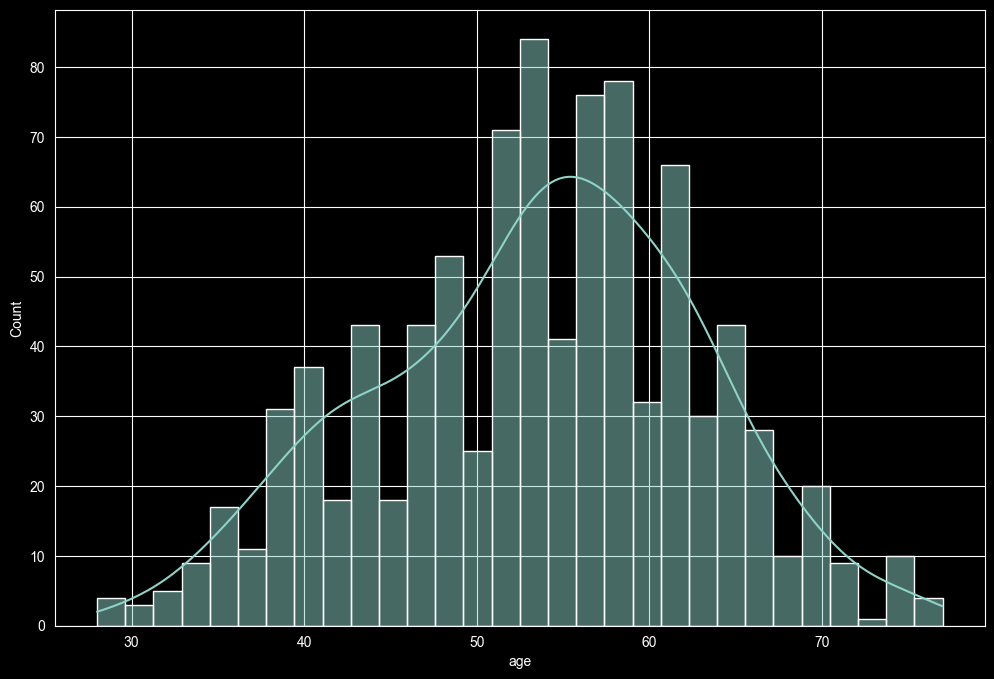

Mean: 53.51
Median: 54.00
Mode: 54.00


In [5]:
plt.style.use('dark_background')

# Histogram to see the distribution of age column
sns.histplot(df['age'], kde=True, bins=30)
plt.show()

print(f"Mean: {df['age'].mean():.2f}")
print(f"Median: {df['age'].median():.2f}")
print(f"Mode: {df['age'].mode()[0]:.2f}")

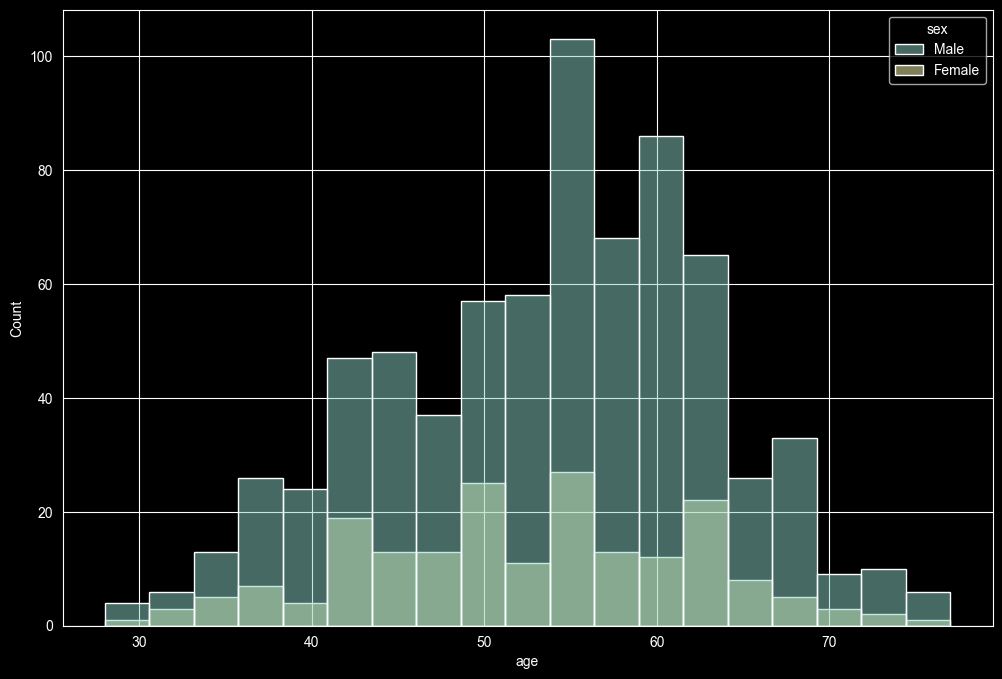

sex
Male      726
Female    194
Name: count, dtype: int64

In [6]:
plt.style.use('dark_background')

# Histogram of the 'age' column colored by 'sex'
sns.histplot(data=df, x='age', hue='sex')
plt.show()

df['sex'].value_counts()

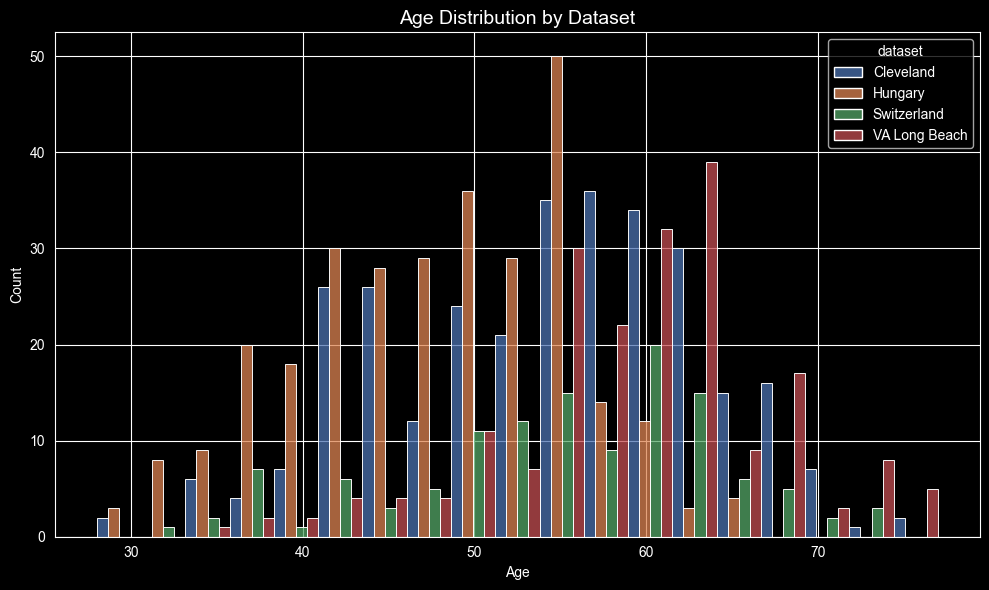

In [7]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='age', hue='dataset', multiple='dodge', palette='deep', edgecolor='white')

plt.title('Age Distribution by Dataset', fontsize=14, color='white')
plt.xlabel('Age', color='white')
plt.ylabel('Count', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

## Data Preprocessing and Feature Engineering

Handles missing values by imputing numerical columns with their median and categorical columns with their mode. Identifies outliers for analysis but removes most of them.

In [8]:
# Identify columns with missing values
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()

print("Columns with missing values and their data types:\n")
df[columns_with_missing_values].info()

print("\nPercentage of missing values in each column:")
missing_percentage = (missing_values[columns_with_missing_values] / len(df)) * 100
print(missing_percentage)

Columns with missing values and their data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  861 non-null    float64
 1   chol      890 non-null    float64
 2   fbs       830 non-null    object 
 3   restecg   918 non-null    object 
 4   thalch    865 non-null    float64
 5   exang     865 non-null    object 
 6   oldpeak   858 non-null    float64
 7   slope     611 non-null    object 
 8   ca        309 non-null    float64
 9   thal      434 non-null    object 
dtypes: float64(5), object(5)
memory usage: 72.0+ KB

Percentage of missing values in each column:
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
dtype: float64


In [9]:
# Step 1: Handle Missing Values
# Check missing values
print("Missing Values Before Handling: \n")
print(df.isnull().sum())

Missing Values Before Handling: 

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
target        0
dtype: int64


In [10]:
# Numerical columns: Impute with median to avoid outlier influence
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns: Impute with mode
categorical_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

C:\Users\advay\AppData\Local\Temp\ipykernel_24896\41831987.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [11]:
print("Missing Values After Handling: \n")
print(df.isnull().sum())

Missing Values After Handling: 

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
target      0
dtype: int64


In [12]:
# Convert boolean columns to integers to avoid seaborn issues
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)

# Handle invalid values (chol = 0, trestbps = 0) with median
df['chol'] = df['chol'].replace(0, df['chol'].median())
df['trestbps'] = df['trestbps'].replace(0, df['trestbps'].median())

# Cap outliers for numerical columns at 1st and 99th percentiles
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
for col in numerical_cols:
    lower_bound, upper_bound = df[col].quantile([0.01, 0.99])
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [13]:
print('Dataset Shape:', df.shape)
print('\nColumn Data Types:\n', df.dtypes)
print('\nBasic Statistics for Numerical Columns:\n', df.describe())

Dataset Shape: (920, 17)

Column Data Types:
 id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs           int64
restecg      object
thalch      float64
exang         int64
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
target        int64
dtype: object

Basic Statistics for Numerical Columns:
                id         age    trestbps        chol         fbs      thalch  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   460.500000   53.515217  132.033587  240.948043    0.150000  137.720543   
std    265.725422    9.346887   17.467387   48.022344    0.357266   24.801929   
min      1.000000   32.000000   95.190000  141.190000    0.000000   77.190000   
25%    230.750000   47.000000  120.000000  217.750000    0.000000  120.000000   
50%    460.500000   54.000000  130.000000  223.000000    0.000000  140.0

In [14]:
# Step 2: Handle Outliers

# Remove invalid values (chol = 0, trestbps = 0)
df = df[df['chol'] > 0]  # Cholesterol cannot be 0
df = df[df['trestbps'] > 0]  # Blood pressure cannot be 0

# Handle negative oldpeak (assume errors, set to 0)
df.loc[df['oldpeak'] < 0, 'oldpeak'] = 0

In [15]:
# Detect outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [16]:
for col in numerical_cols:
    df = remove_outliers(df, col)

In [17]:
print("\nDataset Shape After Outlier Removal:", df.shape)


Dataset Shape After Outlier Removal: (832, 17)


In [18]:
# Step 3: Dataset Overview
print("\nDataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nBasic Statistics for Numerical Columns:\n", df[numerical_cols].describe())


Dataset Shape: (832, 17)

Column Data Types:
 id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs           int64
restecg      object
thalch      float64
exang         int64
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
target        int64
dtype: object

Basic Statistics for Numerical Columns:
               age    trestbps        chol      thalch     oldpeak
count  832.000000  832.000000  832.000000  832.000000  832.000000
mean    53.425481  130.421526  235.275240  137.770829    0.802764
std      9.428519   15.762367   37.314998   24.830940    0.943828
min     32.000000   95.190000  147.000000   77.190000    0.000000
25%     47.000000  120.000000  216.000000  120.000000    0.000000
50%     54.000000  130.000000  223.000000  140.000000    0.500000
75%     60.000000  140.000000  259.250000  156.000000    1.500000
max     74.000000  170.000000

## Exploratory Data Analysis
Explores the dataset through visualizations (e.g., histograms, box plots, correlation heatmaps) to understand feature distributions, relationships, and potential patterns related to the `target` variable.

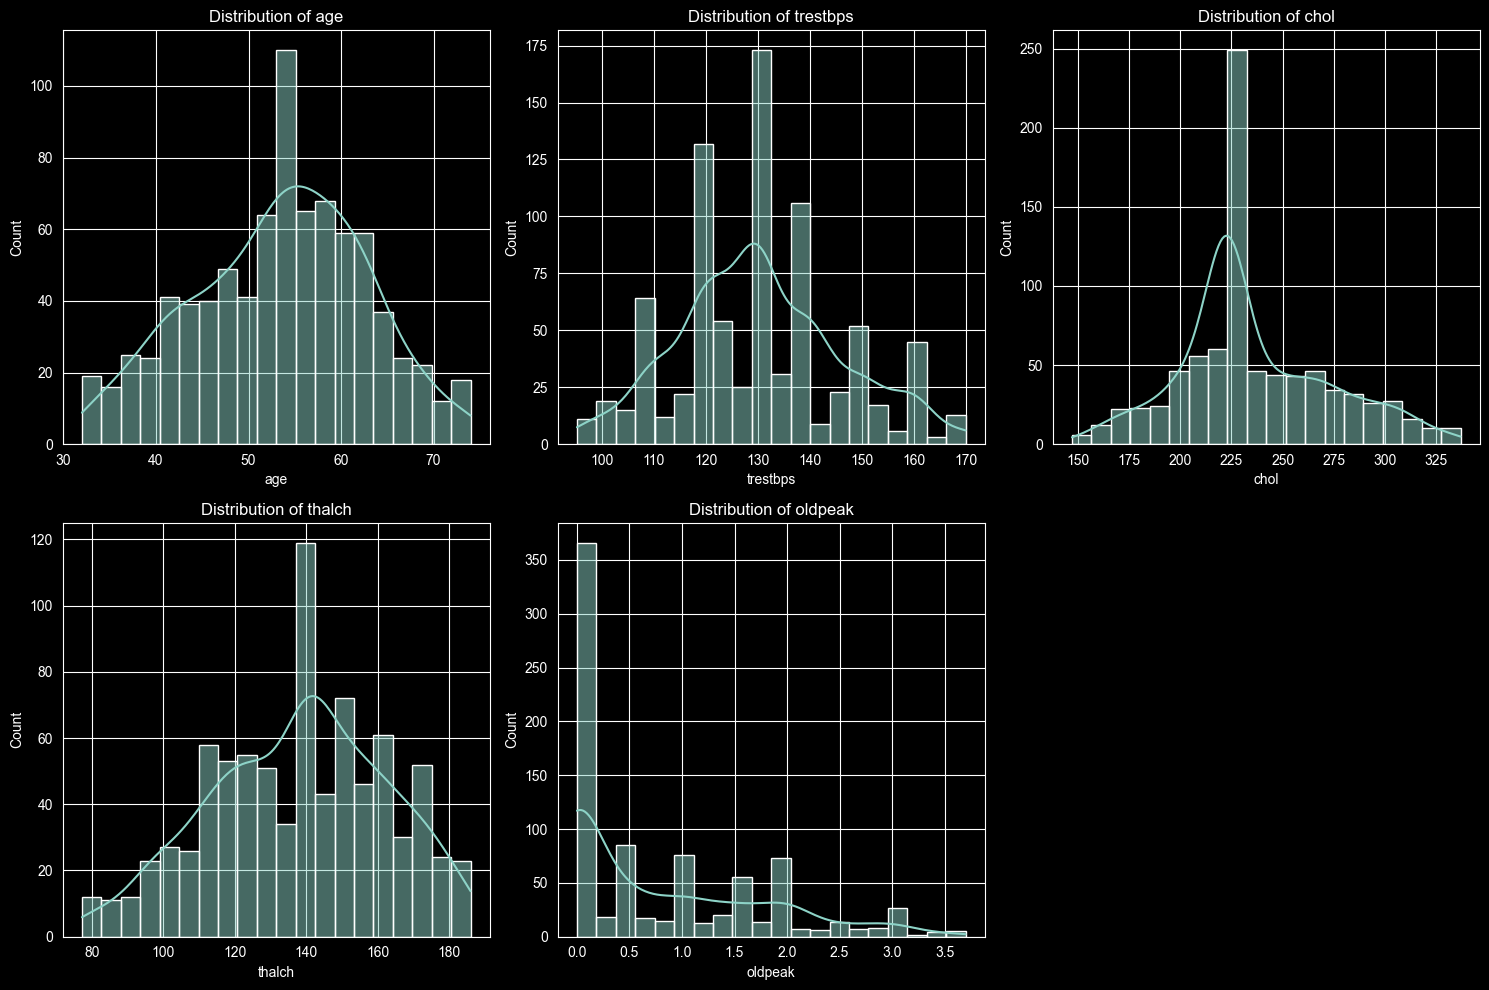

In [19]:
# Step 4: Visualizations
# 4.1: Histograms for Numerical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

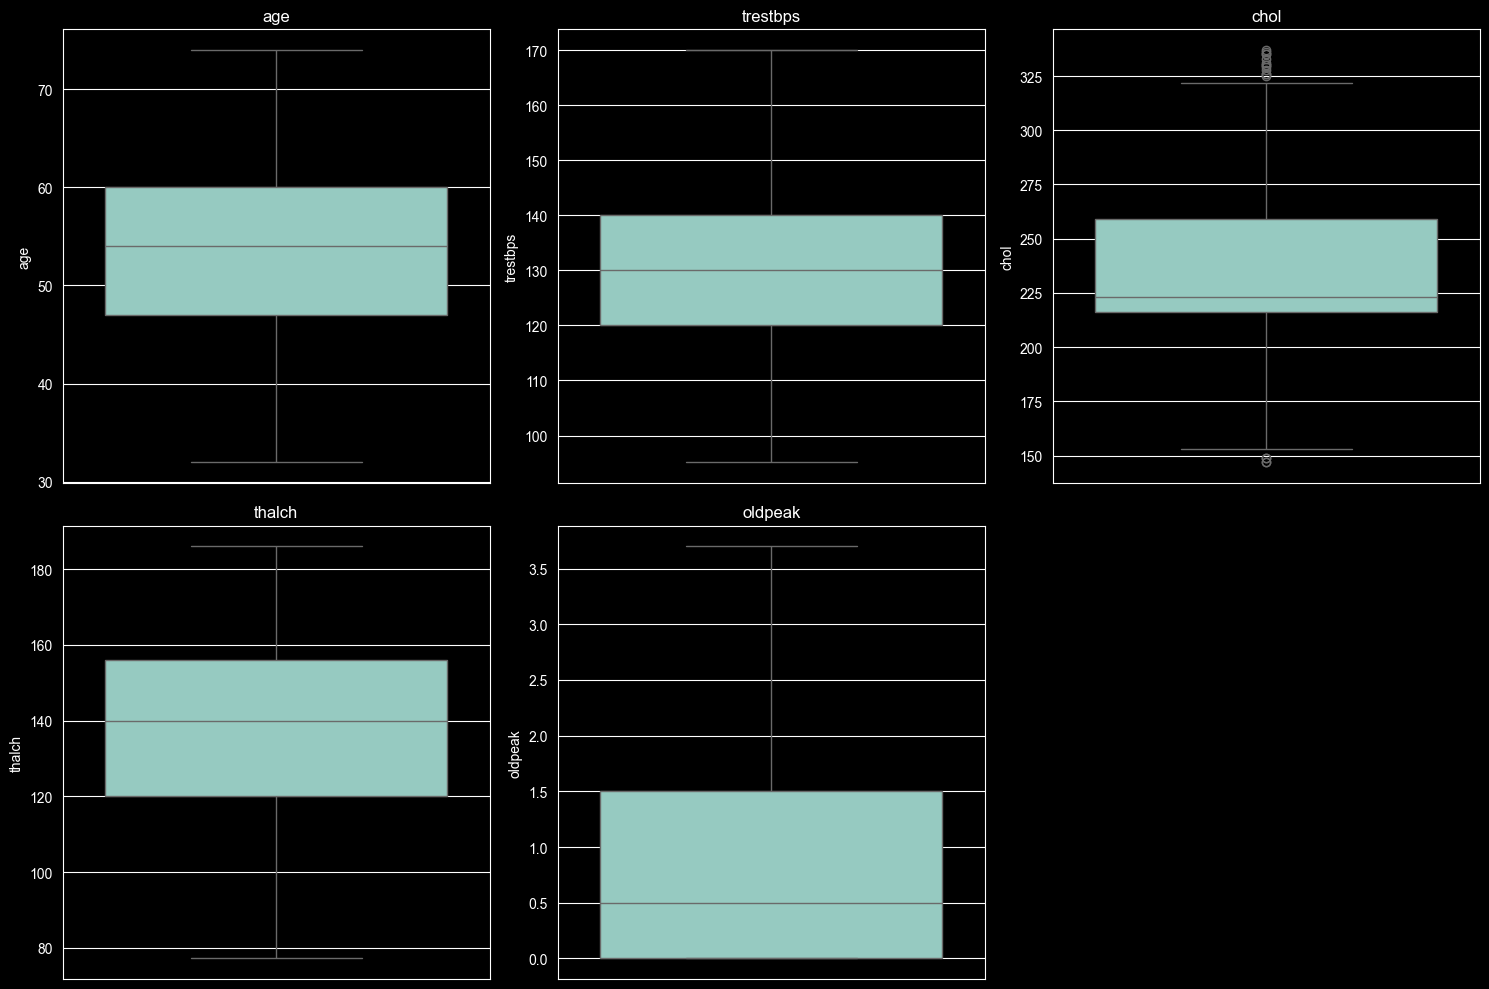

In [20]:
# 4.2: Box Plots for Outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

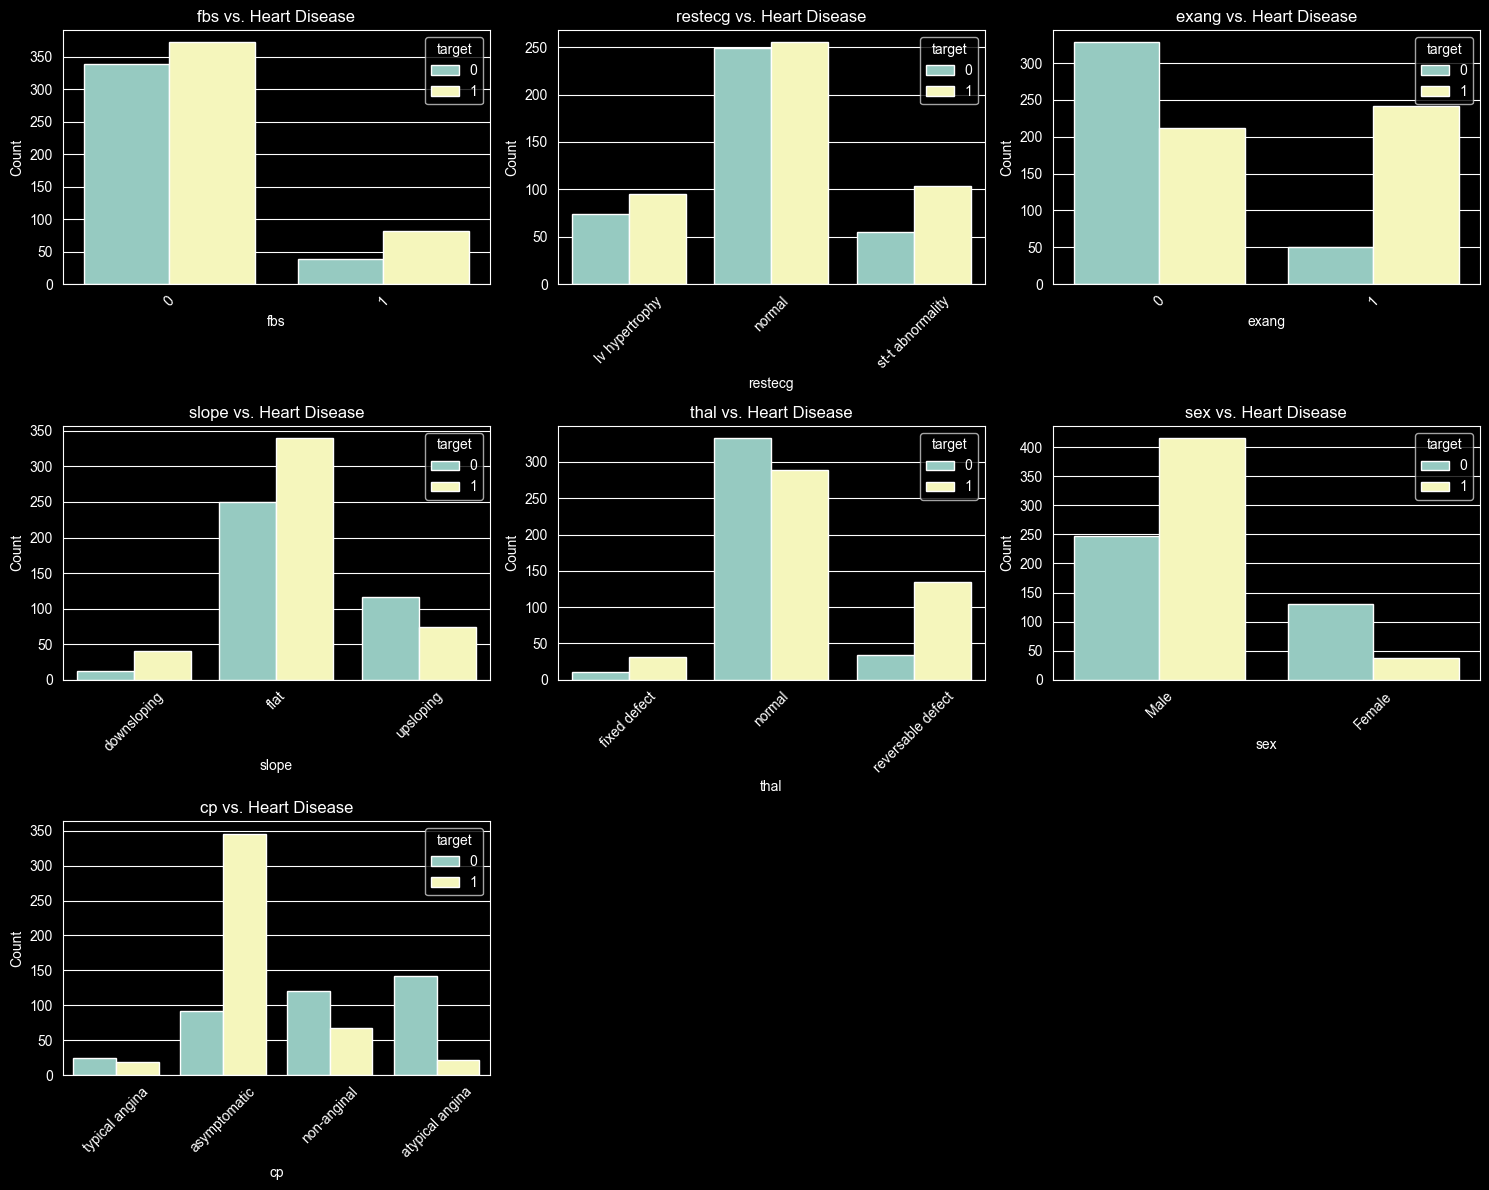

In [21]:
# 4.3: Bar Plots for Categorical Features by Target
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols + ['sex', 'cp'], 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} vs. Heart Disease')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

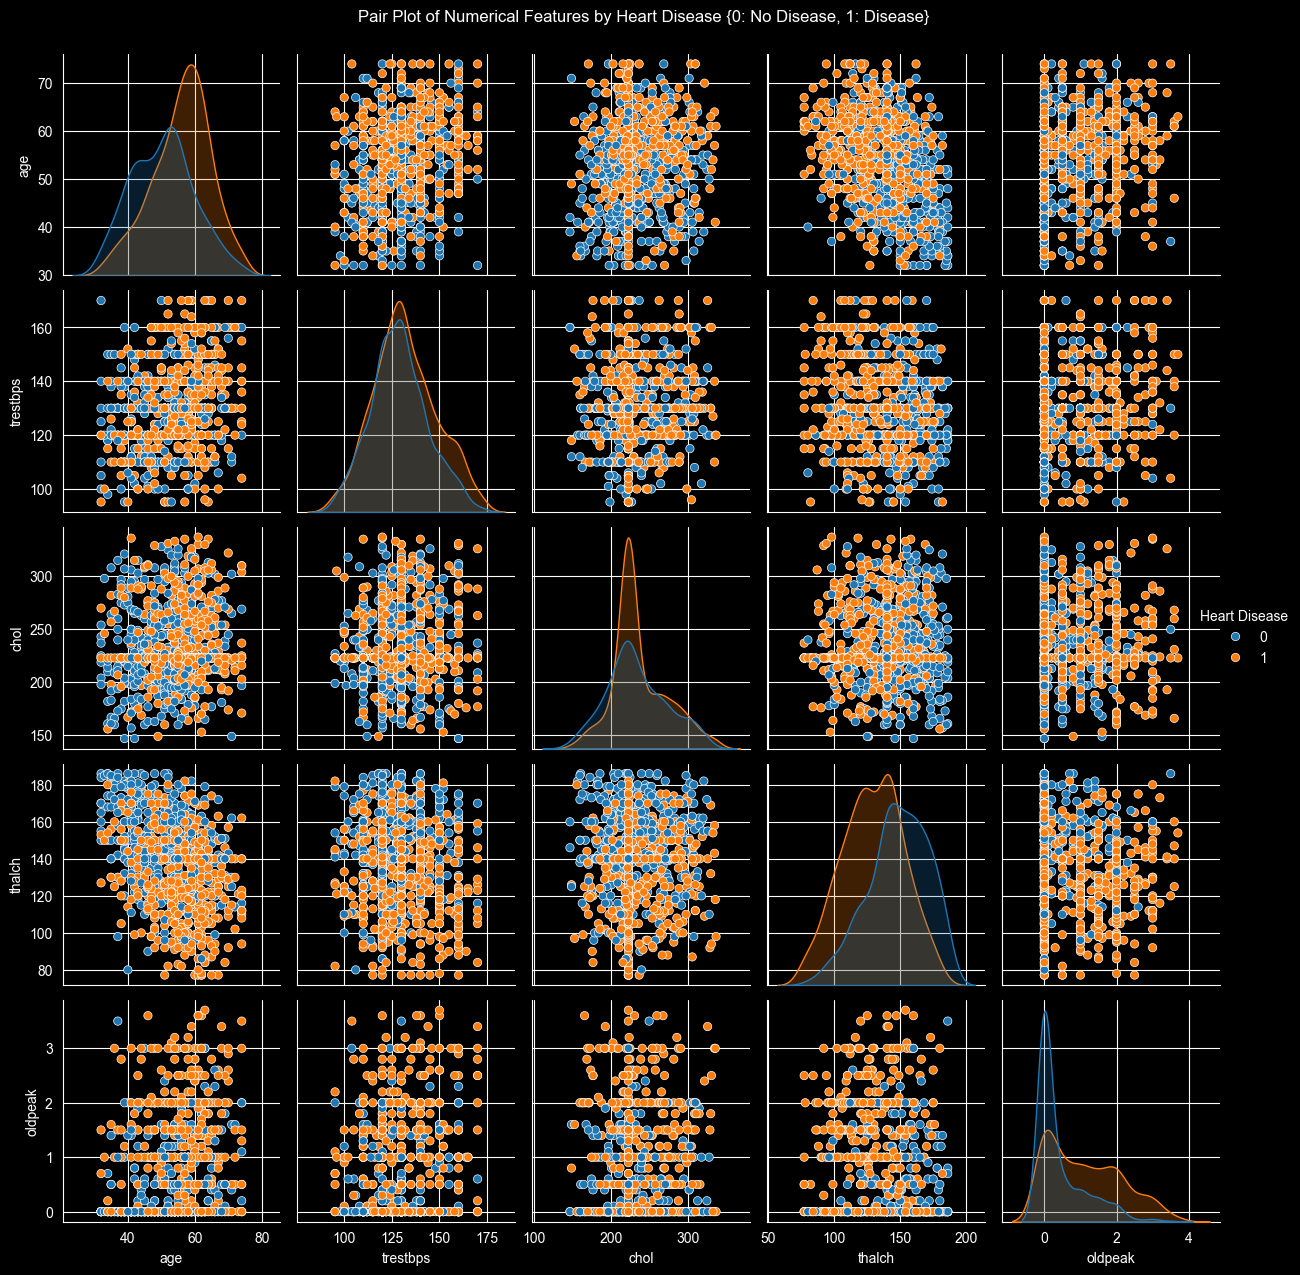

In [22]:
# 4.4: Pair Plot for Numerical Features

pair_plot = sns.pairplot(df[numerical_cols + ['target']], hue='target', diag_kind='kde', hue_order=[0, 1], palette={0: '#1f77b4', 1: '#ff7f0e'})
pair_plot.legend.set_title('Heart Disease')
plt.setp(pair_plot.legend.get_texts(), fontsize=10)
plt.suptitle('Pair Plot of Numerical Features by Heart Disease {0: No Disease, 1: Disease}\n', y=1.02)
plt.show()

In [23]:
# After reducing outliers using IQR
def remaining_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

remaining_outliers(df, 'chol')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target
32,33,64,Male,Cleveland,non-anginal,140.0,335.0,0,normal,158.0,0,0.0,upsloping,0.0,normal,1,1
44,45,61,Female,Cleveland,asymptomatic,130.0,330.0,0,lv hypertrophy,169.0,0,0.0,upsloping,0.0,normal,1,1
68,69,59,Male,Cleveland,asymptomatic,170.0,326.0,0,lv hypertrophy,140.0,1,3.4,downsloping,0.0,reversable defect,2,1
84,85,52,Male,Cleveland,atypical angina,120.0,325.0,0,normal,172.0,0,0.2,upsloping,0.0,normal,0,0
118,119,63,Male,Cleveland,asymptomatic,130.0,330.0,1,lv hypertrophy,132.0,1,1.8,upsloping,3.0,reversable defect,3,1
232,233,49,Male,Cleveland,non-anginal,118.0,149.0,0,lv hypertrophy,126.0,0,0.8,upsloping,3.0,normal,1,1
273,274,71,Female,Cleveland,asymptomatic,112.0,149.0,0,normal,125.0,0,1.6,flat,0.0,normal,0,0
280,281,57,Male,Cleveland,asymptomatic,110.0,335.0,0,normal,143.0,1,3.0,flat,1.0,reversable defect,2,1
340,341,39,Male,Hungary,non-anginal,160.0,147.0,1,normal,160.0,0,0.0,flat,0.0,normal,0,0
360,361,42,Male,Hungary,non-anginal,160.0,147.0,0,normal,146.0,0,0.0,flat,0.0,normal,0,0


In [24]:
chol_outliers = remaining_outliers(df, 'chol')
df = df.drop(chol_outliers.index)

## Model Training and Evaluation
Prepares the data by encoding categorical variables and scaling numerical features, then trains and compares multiple models (Logistic Regression, Decision Tree, Random Forest, XGBoost, SVM) using metrics like accuracy, precision, recall, and F1-score. Includes feature importance analysis for interpretability.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'sklearn'

In [27]:
# Prepare data
X = df.drop(['id', 'dataset', 'num', 'target'], axis=1)
y = df['target']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = RobustScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (652, 18)
X_test shape: (163, 18)
y_train shape: (652,)
y_test shape: (163,)


In [28]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train)),
    'SVM': SVC(kernel='rbf', class_weight='balanced', random_state=42)
}

In [29]:
# Evaluate models
print("\nModel Comparison:")
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Class 1)': precision_score(y_test, y_pred, pos_label=1),
        'Recall (Class 1)': recall_score(y_test, y_pred, pos_label=1),
        'F1-Score (Class 1)': f1_score(y_test, y_pred, pos_label=1)
    })
results_df = pd.DataFrame(results)
results_df


Model Comparison:


,Model,Accuracy,Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
0,Logistic Regression,0.840491,0.858696,0.858696,0.858696
1,Decision Tree,0.766871,0.800000,0.782609,0.791209
2,Random Forest,0.871166,0.908046,0.858696,0.882682
3,XGBoost,0.822086,0.831579,0.858696,0.844920
4,SVM,0.889571,0.885417,0.923913,0.904255


In [30]:
# Feature importance for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nRandom Forest Feature Importance:\n", feature_importance.head(10))  # Top 10 features


Random Forest Feature Importance:
                Feature  Importance
4               thalch    0.159799
0                  age    0.122518
2                 chol    0.116302
6              oldpeak    0.104542
1             trestbps    0.087048
5                exang    0.082316
9   cp_atypical angina    0.072857
8             sex_Male    0.048022
10      cp_non-anginal    0.040647
16         thal_normal    0.028084


## Predictions on Custom Data
A prediction function is defined which classifies new data using any of the implemented binary-classification models.

In [31]:
def predict_heart_disease(input_data, model, scaler, numerical_cols):
    input_df = pd.DataFrame([input_data])
    input_df = pd.get_dummies(input_df).reindex(columns=X_train.columns, fill_value=0)
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    prediction = model.predict(input_df)
    return "Heart Disease - POSITIVE: Need Medical Assistance!" if prediction[0] == 1 else "Heart Disease - NEGATIVE: Take Good Care :)"

# Sample Data
sample_data = {
    'age': 55, 'sex': 'Male', 'cp': 'asymptomatic', 'trestbps': 130,
    'chol': 250, 'fbs': False, 'restecg': 'normal', 'thalch': 140,
    'exang': True, 'oldpeak': 1.5, 'slope': 'flat', 'ca': 1, 'thal': 'normal'
}
print(predict_heart_disease(sample_data, models['SVM'], scaler, numerical_cols))

Heart Disease - POSITIVE: Need Medical Assistance!


## Conclusion

This project developed a binary classification model to predict heart disease presence using the UCI Heart Disease dataset, achieving robust results with multiple machine learning algorithms. Below are the key findings, implications and limitations.

### Key Findings
- **Model Performance**: The Support Vector Machine (SVM) model achieved the highest performance with an accuracy of 88.96%, precision of 88.54%, recall of 92.39%, and F1-score of 90.43% for predicting heart disease (Class 1). Random Forest followed closely (accuracy: 87.12%, F1-score: 88.27%), while Decision Tree had the lowest performance (accuracy: 76.69%).
- **Feature Importance**: Random Forest analysis identified `thalch` (maximum heart rate), `age`, `chol` (cholesterol), and `oldpeak` (ST depression) as the top predictors, aligning with clinical risk factors. Categorical features like `cp_atypical angina`, `sex_Male`, and `thal_normal` also contributed significantly.
- **Data Insights**: The dataset was cleaned by removing all rows with missing values and outliers in `chol`, resulting in 815 records. The mean age (~53.5 years) reflects a middle-aged and older population, a key demographic for heart disease.

### Implications
- The high recall of the SVM model (92.39%) is critical for medical applications, minimizing false negatives and ensuring most heart disease cases are detected.
- Key features like `thalch`, `age`, and `chol` align with medical knowledge, suggesting that models trained on this dataset could support clinical decision-making by prioritizing measurable risk factors.
- Ensemble methods (Random Forest, XGBoost) effectively capture complex relationships in the data, making them suitable for heart disease prediction.

### Limitations
- **Hyperparameter Tuning**: Given this project is based primarily on data analysis and machine learning fundamentals, models used default hyperparameters, potentially limiting their performance.
- **Single Train-Test Split**: Performance metrics are based on a single train-test split, which may introduce variability.

### Final Thoughts
This project demonstrates the potential of machine learning for heart disease prediction, with SVM and Random Forest models showing strong performance. By addressing the identified limitations and incorporating the recommended improvements, the model could be refined for practical clinical applications, potentially aiding early diagnosis and improving patient outcomes.